Завантаження потрібних бібліотек

In [ ]:
pip install -U dataprep

In [ ]:
pip install -U ydata-profiling

In [2]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_pd = pd.read_excel("/content/Top customers.xlsx")
df_pd.head()

,Name,Group,Billing address,Billing city,Billing state,Billing zip,Shipping address,Shipping city,Shipping state,Shipping zip,...,Contact name,Contact role,Contact phone,Contact email,Order direct access,Total orders,Total sales,Business Fax,Primary payment method,Licenses & certifications
0,Doras Naturals,Doras Naturals,"9419 3rd Ave, Brooklyn, NY 11209",New York,NY,11209,"9419 3rd Ave, Brooklyn, NY 11209",New York,NY,11209,...,NaN,NaN,NaN,NaN,No,123,18899.1574,NaN,NaN,NaN
1,Excel import,Excel import,"1077 Broadway, Brooklyn, NY 11221",New York,NY,11221,"1077 Broadway, Brooklyn, NY 11221",New York,NY,11221,...,NaN,NaN,NaN,NaN,No,22,3292.0776,NaN,NaN,NaN
2,INS Contractors,Uncategorized,"2548 W 13th St, Brooklyn, NY 11223",New York,NY,11223,"2548 W 13th St, Brooklyn, NY 11223",New York,NY,11223,...,NaN,NaN,NaN,NaN,No,11,2701.7912,NaN,NaN,NaN
3,Potential Customers,Potential Customers,"367 Main St, Amagansett, NY 11930",Amagansett,NY,11930,"367 Main St, Amagansett, NY 11930",Amagansett,NY,11930,...,NaN,NaN,NaN,NaN,No,7,2183.3880,NaN,NaN,NaN
4,Brothers Bagels,Potential Customers,"532 Neptune Ave, Brooklyn, NY 11224",New York,NY,11224,"532 Neptune Ave, Brooklyn, NY 11224",New York,NY,11224,...,Samen,Primary,NaN,NaN,No,3,867.8988,NaN,NaN,NaN


In [4]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       153 non-null    object 
 1   Group                      153 non-null    object 
 2   Billing address            153 non-null    object 
 3   Billing city               153 non-null    object 
 4   Billing state              153 non-null    object 
 5   Billing zip                153 non-null    int64  
 6   Shipping address           153 non-null    object 
 7   Shipping city              153 non-null    object 
 8   Shipping state             153 non-null    object 
 9   Shipping zip               153 non-null    int64  
 10  Phone                      129 non-null    object 
 11  Payment terms              149 non-null    object 
 12  Customer discount          153 non-null    float64
 13  Territory                  138 non-null    object 

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

In [ ]:
# @title Top customers report
profile

Output hidden; open in https://colab.research.google.com to view.

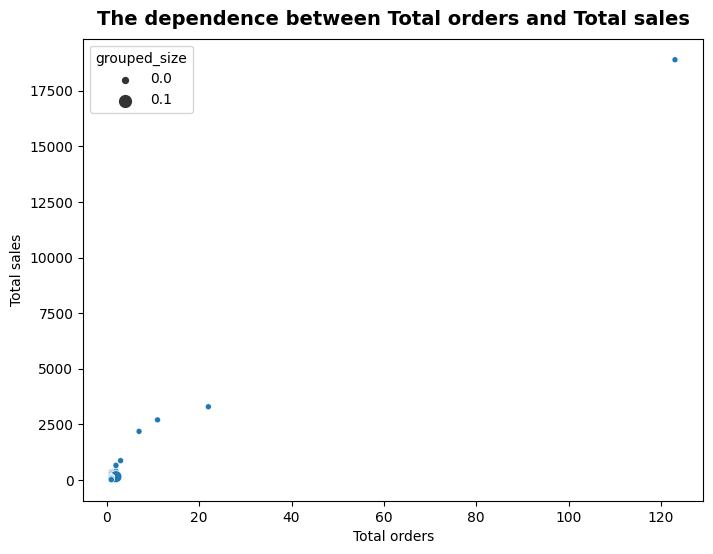

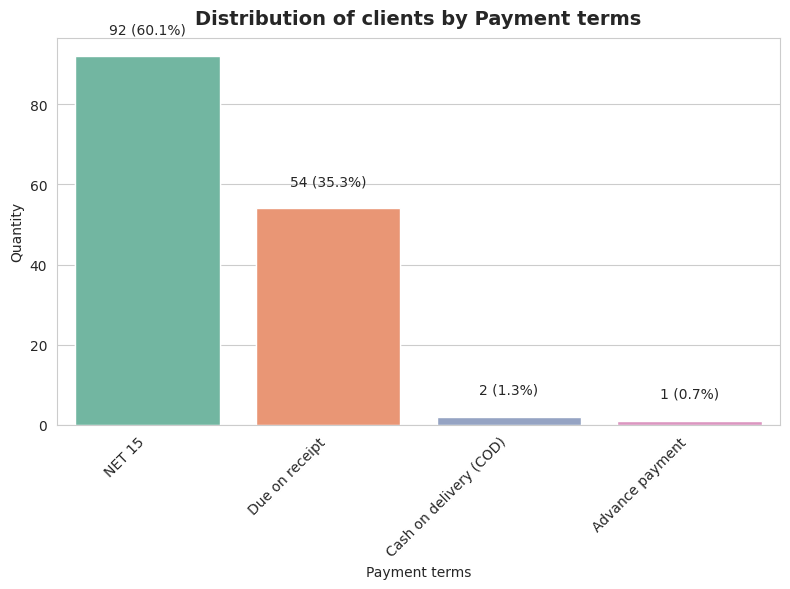

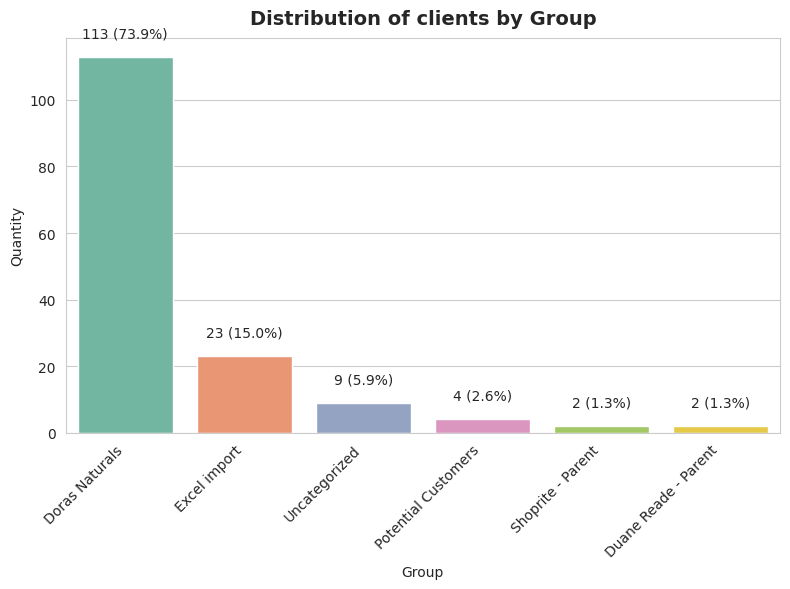

In [6]:
# @title Visualization of Customer_details
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def scatter_with_size_and_grouping(df, x_col, y_col, size_col, hue_col=None, threshold=25):
  """
  Creates a scatter plot with the size of the points corresponding to the third variable and grouping of values above the threshold.

  Args:
      df: pandas DataFrame with data.
      x_col: The name of the column with the x-variable.
      y_col: The name of the column with the y-variable.
      size_col: The name of the column with the variable for the size of the points.
      hue_col: Name of the column with the variable for the color of the points (optional).
      threshold: Threshold for grouping values (default is 25).
  """
  df_copy = df.copy()  # Creating a copy so as not to change the original DataFrame

  df_below_threshold = df_copy[df_copy[size_col] <= threshold]
  df_above_threshold = df_copy[df_copy[size_col] > threshold]

  # Calculating the number of entries for each group
  counts_below = df_below_threshold[size_col].value_counts().sort_index()
  count_above = df_above_threshold[size_col].count()

  # Create new columns with group values and sizes
  df_below_threshold['grouped_size'] = df_below_threshold[size_col]
  df_above_threshold['grouped_size'] = f"{threshold}+"

  df_grouped = pd.concat([df_below_threshold, df_above_threshold])

  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=x_col, y=y_col, size='grouped_size', hue=hue_col, data=df_grouped)
  plt.title(f"The dependence between {x_col} and {y_col}", fontweight="black", size=14, pad=10)
  plt.show()

def bar_plot_sorted_with_percentages(df, col):
  """
  Creates a bar chart for a categorical variable with column sorting and display of values and percentages.

  Args:
      df: pandas DataFrame with the data.
      col: The name of the column with the categorical variable.
  """
  plt.figure(figsize=(8, 6))
  sns.set_style("whitegrid")
  palette = sns.color_palette("Set2")
  # Calculate quantities and percentages
  counts = df[col].value_counts().sort_values(ascending=False)
  percentages = (counts / len(df)) * 100

  # Create a bar chart
  bars = plt.bar(counts.index, counts)
  sns.barplot(x=counts.index, y=counts.values, palette=palette)
  # Add values and percentages above columns
  for bar, count, percentage in zip(bars, counts, percentages):
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height + 5,
               f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

  plt.xlabel(col)
  plt.ylabel('Quantity')
  plt.title(f"Distribution of clients by {col}", fontweight="black", size=14, pad=10)
  plt.xticks(rotation=45, ha='right')  # Rotate captions along the X-axis for better readability
  plt.tight_layout()  # Automatically adjust indents
  plt.show()


# Calling visualization functions
scatter_with_size_and_grouping(df_pd, 'Total orders', 'Total sales', 'Customer discount')
bar_plot_sorted_with_percentages(df_pd, 'Payment terms')
bar_plot_sorted_with_percentages(df_pd, 'Group')

In [7]:
# @title Data distribution visualization function
import matplotlib.pyplot as plt
import pandas as pd

def plot_non_zero_sales_grouped(df, sales_col='Total sales', threshold=500):
  """
  Creates a dot plot with connected points, grouping values above the threshold and excluding zeros.

  Args:
      df (pd.DataFrame): The DataFrame containing the sales data.
      sales_col (str, optional): The name of the column containing sales values.
                                         The default is 'Total sales'.
      threshold (int, optional): Threshold above which values are grouped.
                                  The default is 500.
  """
  # Filtering for null values
  df_filtered = df[df[sales_col] > 0]

  # Creating separate DataFrames for values below and above the threshold
  df_below_threshold = df_filtered[df_filtered[sales_col] <= threshold]
  df_above_threshold = df_filtered[df_filtered[sales_col] > threshold]

  # Calculating the number of occurrences for each DataFrame
  counts_below = df_below_threshold[sales_col].value_counts().sort_index()
  count_above = df_above_threshold[sales_col].count()

  # Combining values and number of occurrences to build a graph
  values = counts_below.index.tolist() + [f"{threshold}+"]
  counts = counts_below.values.tolist() + [count_above]

  plt.figure(figsize=(10, 6))
  plt.plot(values, counts, marker='o', linestyle='-', linewidth=1, color='tab:blue')

  plt.xlabel("Value of total sales", fontsize=12)
  plt.ylabel("Number of entries", fontsize=12)
  plt.title("Distribution of non-zero total sales", fontsize=14, fontweight='bold')
  plt.xticks(rotation=45, ha='right')

  plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
  plt.gca().spines[['top', 'right']].set_visible(False)

  plt.tight_layout()
  plt.show()

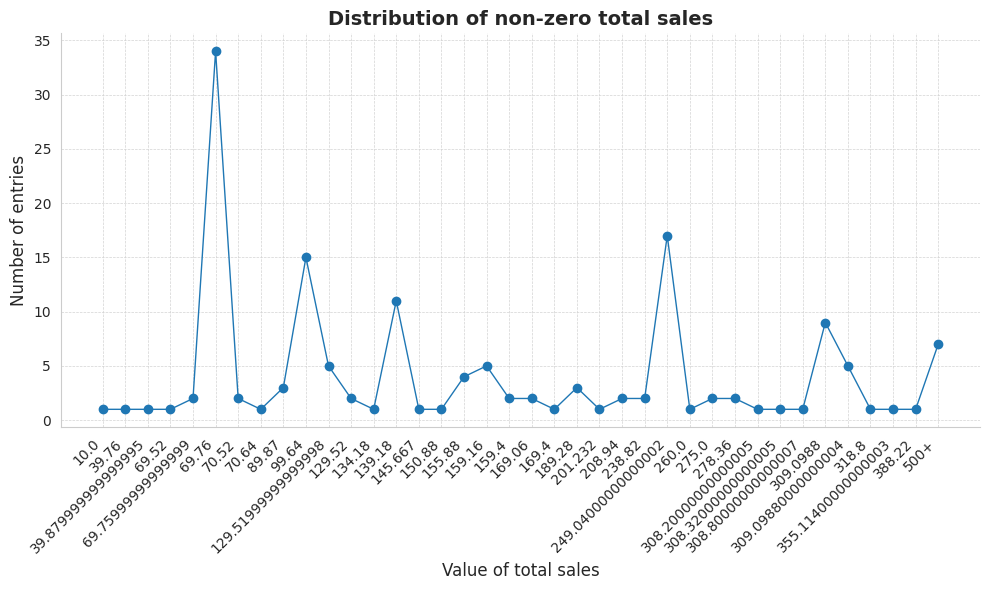

In [8]:
# @title Distribution of sales data
plot_non_zero_sales_grouped(df_pd)

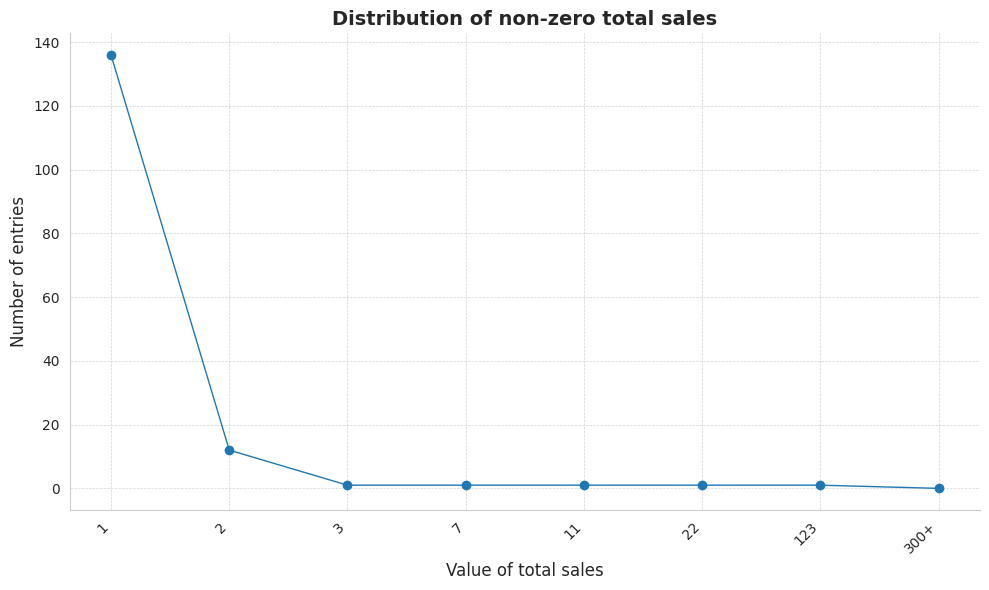

In [9]:
# @title Distribution of orders
plot_non_zero_sales_grouped(df_pd, sales_col='Total orders', threshold=300)

In [10]:
# @title Email analysis
import pandas as pd
import matplotlib.pyplot as plt

# Function for creating a pie chart
def create_pie_chart(df_pd):
    email_count = df_pd['Contact email'].notna().sum()
    empty_count = df_pd['Contact email'].isna().sum()
    #Dictionary with data for a pie chart
    pie_data = {'Emails': email_count, 'Did not specify an email': empty_count}
    plt.figure(figsize=(6,6))
    plt.pie(pie_data.values(), labels=pie_data.keys(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Email distribution')
    plt.show()

# Function for creating a bar chart
def create_bar_chart(df_pd):
    email_counts = df_pd['Contact email'].value_counts()[:10]
    email_counts = email_counts.sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    palette = sns.color_palette("Set2")
    counts = email_counts
    percentages = (counts / len(df_pd)) * 100

    bars = plt.bar(counts.index, counts)
    sns.barplot(x=counts.index, y=counts.values, palette=palette)
    # Add values and percentages above columns
    for bar, count, percentage in zip(bars, counts, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

    plt.xlabel('Email')
    plt.ylabel('Quantity')
    plt.title('Email distribution', fontweight="black", size=14, pad=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

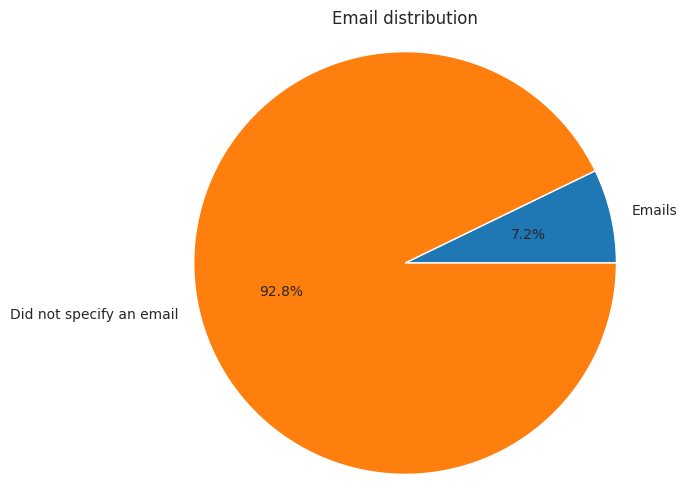

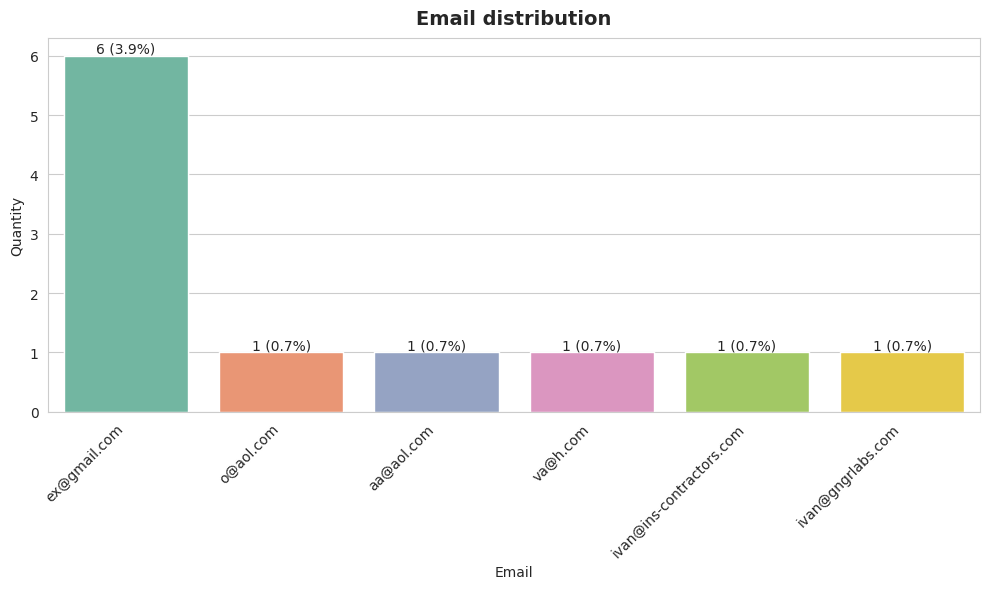

In [11]:
create_pie_chart(df_pd)
create_bar_chart(df_pd)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def correlation_matrix(df_pd):
    df_pd = df_pd.apply(lambda x: x.astype('category').cat.codes) # замінює рядки числовими значеннями
    corr_matrix = df_pd.corr().round(2)
    return corr_matrix
def visualize_dependencies(df_pd, threshold=0.7):
  """
  Visualizes the dependencies between variables with a correlation coefficient above the specified threshold.

  Args:
    df_pd: Pandas DataFrame with data.
    threshold: The threshold value for the correlation coefficient (0.7 by default).
  """
  # Calculate the correlation matrix
  corr_matrix = correlation_matrix(df_pd)

  # Find correlations above the threshold (without taking into account the correlation with the variable itself)
  high_corr = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()
  high_corr.columns = ['variable1', 'variable2', 'correlation']
  high_corr = high_corr[high_corr['variable1'] != high_corr['variable2']]

  # Determine the type of graph depending on the type of data
  for i, row in high_corr.iterrows():
    var1, var2, corr = row

    # Get the data types of variables
    var1_type = df_pd[var1].dtype
    var2_type = df_pd[var2].dtype

    plt.figure()

    # Numerical vs numerical - scatter plot
    if pd.api.types.is_numeric_dtype(var1_type) and pd.api.types.is_numeric_dtype(var2_type):
      sns.scatterplot(x=df_pd[var1], y=df_pd[var2])

    # Categorical vs. numerical or vice versa - box plot
    elif (pd.api.types.is_categorical_dtype(var1_type) and pd.api.types.is_numeric_dtype(var2_type)) or \
         (pd.api.types.is_numeric_dtype(var1_type) and pd.api.types.is_categorical_dtype(var2_type)):
      if pd.api.types.is_categorical_dtype(var1_type):
        sns.boxplot(x=df_pd[var1], y=df_pd[var2])
      else:
        sns.boxplot(x=df_pd[var2], y=df_pd[var1])

    # Categorical vs categorical - heatmap of the relationship table
    elif pd.api.types.is_categorical_dtype(var1_type) and pd.api.types.is_categorical_dtype(var2_type):
      cross_tab = pd.crosstab(df_pd[var1], df_pd[var2])
      sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")

    # If the data types are not suitable for any graph, display a message
    else:
      print(f"Warning: It is not possible to visualize the relationship between {var1} ({var1_type}) та {var2} ({var2_type})")

    # Add a title and axis names
    plt.title(f"The relationship between {var1} and {var2} ({corr:.2f})")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
visualize_dependencies(df_pd, threshold=0.7)

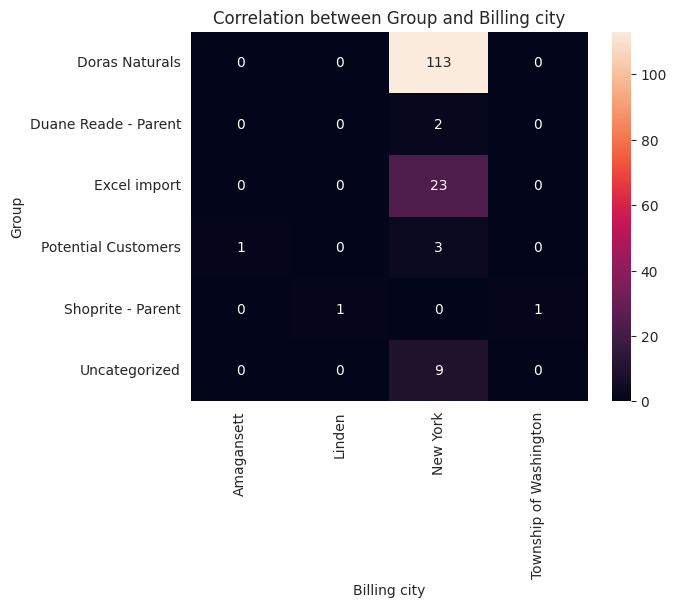

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Припустимо, що df - ваш датасет Pandas
def visualize_correlation(df, column1, column2):
    # Створюємо таблицю спільності для двох стовпчиків
    crosstab = pd.crosstab(df[column1], df[column2])

    # Візуалізуємо таблицю спільності за допомогою теплової карти
    sns.heatmap(crosstab, annot=True, fmt="d")

    # Додаємо назви стовпчиків та підпис
    plt.xlabel(column2)
    plt.ylabel(column1)
    plt.title(f'Correlation between {column1} and {column2}')

    # Відображаємо графік
    plt.show()

# Викликаємо функцію для візуалізації кореляції між стовпчиками "Group" та "Billing City"
visualize_correlation(df_pd, 'Group', 'Billing city')


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_group_distribution_comparison(data, group_col, city_col):
  """
  Visualizes the distribution of customer groups by city using bar charts.
  Creates two charts side by side: one with all cities and one without the most popular city.

  Args:
    data: Pandas DataFrame with data.
    group_col: The name of the column with the customer groups.
    city_col: Name of the column with cities.
  """
  # Determining the most popular city
  most_frequent_city = data[city_col].value_counts().index[0]

  # Create a figure with two subplots
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

  # Graph 1: All cities
  grouped_data = data.groupby([group_col, city_col]).size().unstack(fill_value=0)
  grouped_data.plot(kind='bar', stacked=True, ax=axes[0])
  axes[0].set_title("Distribution of client groups by city")
  axes[0].set_xlabel("City")
  axes[0].set_ylabel("Number of clients")
  axes[0].legend(title="Group")

  # Graph 2: Without the most popular city
  filtered_data = data[data[city_col] != most_frequent_city]
  grouped_data = filtered_data.groupby([group_col, city_col]).size().unstack(fill_value=0)
  grouped_data.plot(kind='bar', stacked=True, ax=axes[1])
  axes[1].set_title(f"Distribution of client groups by city (without {most_frequent_city})")
  axes[1].set_xlabel("City")
  axes[1].set_ylabel("Number of clients")
  axes[1].legend(title="Group")

  # Adjust the distance between the graphs
  plt.tight_layout()

  # Display graphs
  plt.show()

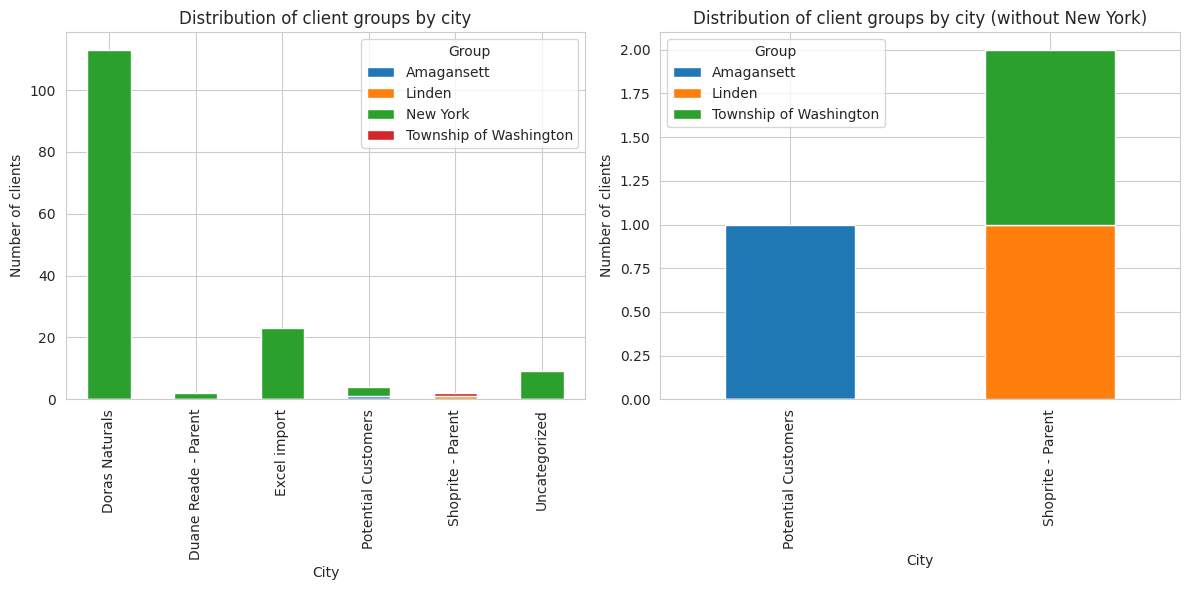

In [14]:
visualize_group_distribution_comparison(df_pd, 'Group', 'Billing city')